In [8]:
import tensorflow as tf
from mnist_models import get_dataset, flat_model
from pandas import DataFrame
import altair as alt
alt.renderers.enable('notebook')

def loss_accuracy_chart(history):
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['categorical_accuracy'] + history.history['val_categorical_accuracy']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    return chart_loss + chart_accuracy

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.7971 - categorical_accuracy: 0.8062 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4077 - categorical_accuracy: 0.8917 - val_loss: 0.3486 - val_categorical_accuracy: 0.9069
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3489 - categorical_accuracy: 0.9047 - val_loss: 0.3163 - val_categorical_accuracy: 0.9138
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3219 - categorical_accuracy: 0.9113 - val_loss: 0.2986 - val_categorical_accuracy: 0.9179
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3058 - categorical_accuracy: 0.9154 - val_loss: 0.2895 - val_categorical_accuracy: 0.9197
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2948 - categorical_accuracy: 0.9184 - val_loss: 0.2825 - val_categorical_accuracy: 0.9

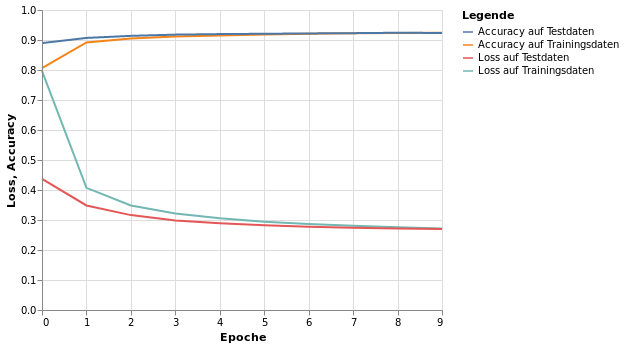

In [10]:
no_epochs = 10
input_shape, train_dataset, test_dataset = get_dataset(batch_size=200)
model = flat_model(input_shape, 10)
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.categorical_accuracy])
history = model.fit(train_dataset, epochs=no_epochs, validation_data=test_dataset)
print('---------------- Evaluate ----------------')
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
loss_accuracy_chart(history)